In [1]:
from __future__ import absolute_import, print_function, unicode_literals
import sys
import os
import repackage
repackage.up()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from importlib import reload
import analysis2 as a2
from IPython.display import display, HTML
sys.path.append('/home/janekg89/Develop/Pycharm_Projects/flutype_webapp')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "flutype_webapp.settings")
import django
django.setup()
from flutype.models import Spot

/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


****************************************
RUNNING IN DEVELOP
****************************************


In [2]:
np.random.RandomState(12345)

In [3]:
cs = ["slide_21","slide_22","slide_26","slide_27","slide_31","slide_32","slide_36","slide_23","slide_28","slide_33","slide_37"]
spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__sid__in=cs)
spots_dj = spots_dj.filter(spot_collection__sid = "quant1")
spots_dj = spots_dj.filter(circle_quality__gte = 0.3)

In [4]:
reload(a2)

<module 'analysis2' from '/home/janek89/Dev/flutype_analysis_web/analysis2.py'>

In [5]:
data = a2.Data(spots_dj=spots_dj).outlier_filtering().sample_on_collection(20).clean()

/home/janek89/Dev/flutype_analysis_web/preprocessing.py:14: RuntimeWarning: invalid value encountered in double_scalars
  modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y for y in ys]


In [10]:
lb = data.ligand_batch_significance().groupby("Ligand Batch").apply(lambda x: x["Significance"].max()).sort_values(ascending=False)

In [11]:
pbs = [list(lb.index.values[:i]) for i in range(1,len(lb.index.values))]
pbs_len =  [len(lb.index.values[:i]) for i in range(1,len(lb.index.values))]


In [12]:
complete = data.train_test_combinations[:1]
complete["Test"]=[tuple(cs)]*len(complete)
complete["Train"]=[tuple(cs)]*len(complete)
complete.loc[1] = complete.loc[0]

/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

In [13]:
pprint(pbs_len)

Pretty printing has been turned OFF


In [15]:
frames = []
#spots_this = spots_dj.filter(raw_spot__lig_fix_batch__sid__in = pb)
data = a2.Data(spots_dj=spots_dj)
data = data.outlier_filtering().sample_on_collection(200).clean()

for pb in pbs[:40]:
    ana = a2.Analysis(data.subset_ligand_batches(pb),train_test=complete)
    ana.calculate_all()
    frames.append(ana.complete_information())


/home/janek89/Dev/flutype_analysis_web/analysis2.py:130: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  comb.set_value(i, "Test", row)
/home/janek89/Dev/flutype_analysis_web/analysis2.py:131: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  comb.set_value(i, "Train", tuple(set(cs) - set(row)))
/home/janek89/Dev/flutype_analysis_web/preprocessing.py:14: RuntimeWarning: invalid value encountered in double_scalars
  modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y for y in ys]


*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models****

In [16]:
result = pd.concat(frames , keys =pbs_len)
result.index.names = ["Peptide Batches", 'Analyte Batch',"Collection", "Sample"]
result_mean = result.reset_index().groupby(["Peptide Batches","Analyte Batch","Test"]).mean()
result_mean =result_mean.reset_index()
result_mean["Peptide Batches"] = result_mean["Peptide Batches"].astype("float")


In [17]:
result["TrueFalse"].value_counts()

1    126920
0     49080
Name: TrueFalse, dtype: int64

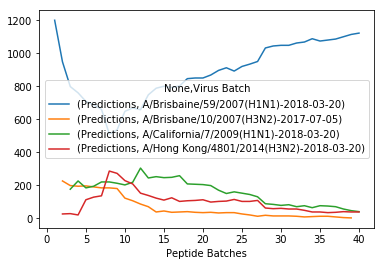

In [18]:
one_virus_data = result[result["y"] == "A/Brisbaine/59/2007(H1N1)-2018-03-20"]
values = pd.DataFrame(one_virus_data.groupby("Peptide Batches")["Predictions"].value_counts())
values.index.names = ['Peptide Batches', 'Virus Batch']
data = pd.pivot_table(values, values=["Predictions"],index=["Peptide Batches"],columns=["Virus Batch"])
data.plot()
plt.show()

In [19]:
one_virus_data.groupby(["Peptide Batches","Collection"]).apply(lambda x:  np.amax(x["Predictions"]))
one_virus_data
one_virus_data[one_virus_data.index.get_level_values("Peptide Batches") == 20]["Predictions"].value_counts().idxmax()

'A/Brisbaine/59/2007(H1N1)-2018-03-20'

In [20]:
result_m = result.groupby(["Peptide Batches","Analyte Batch","Collection"]).apply(lambda x:  x["Predictions"].value_counts().idxmax())
#display(result_m)
result_m = pd.DataFrame(result_m)
result_m = result_m.reset_index().rename(columns={0:"Majority"})
result_m["ms"] = (result_m["Majority"] == result_m["Analyte Batch"]).astype(float)


In [21]:
#result_m_mean = result_m.reset_index().groupby(["Peptide Batches","Analyte Batch","Test"]).mean().reset_index()



In [22]:
result_mean["Name"] = "Mean" 


In [25]:
mpl.rcParams['font.family'] = 'San Francisco'
mpl.rcParams['font.family'] = 'bla'

font = {'family' : 'Roboto',
        'weight' : 'normal',
        'size'   : 15}

mpl.rc('font', **font)
import seaborn as sns


/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


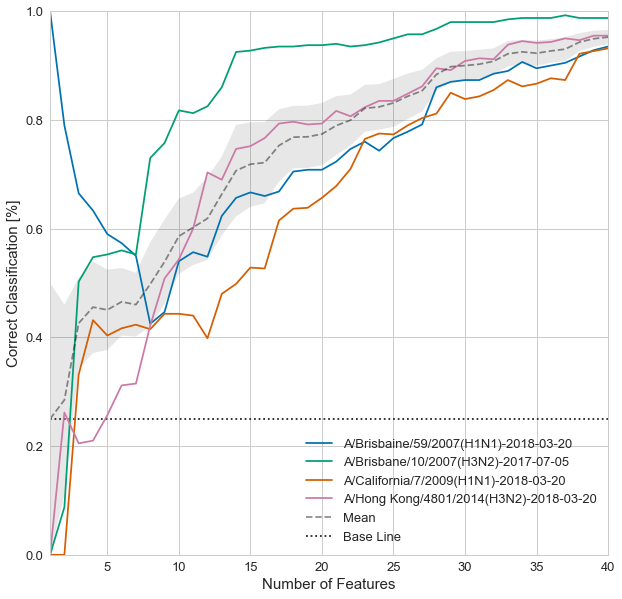

In [26]:
sns.set(style="whitegrid", palette="colorblind", color_codes=True )
fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.tsplot(time="Peptide Batches", value="TrueFalse", unit="Test", condition="Analyte Batch",data=result_mean)
ax = sns.tsplot(time="Peptide Batches", value="TrueFalse", unit="Analyte Batch", condition="Name", data=result_mean, color="k", linestyle="--", alpha=0.5, err_kws = {'alpha':0.1},legend=True,)
ax.hlines(y = 0.25,xmin=0,xmax=len(pbs),linestyle=":",label="Base Line") 
ax.set_ylim(0,1.0 )
ax.legend(fontsize=13)


plt.xlabel("Number of Features",fontsize=15)
plt.ylabel("Correct Classification [%]",fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


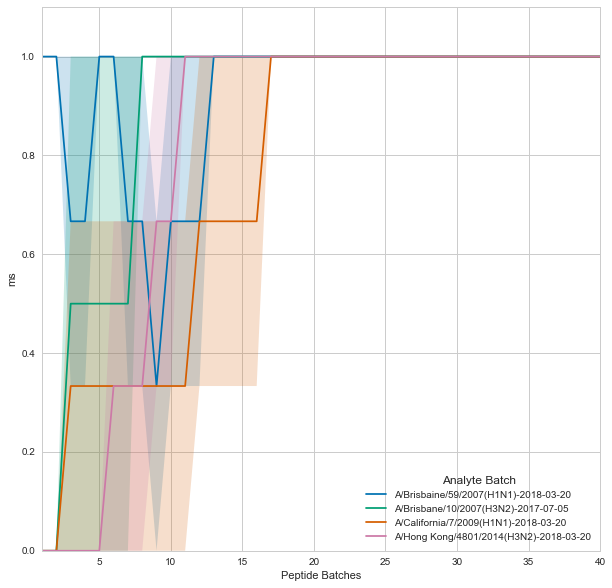

In [27]:


fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.tsplot(time="Peptide Batches", value="ms", unit="Collection", condition="Analyte Batch",data=result_m)
ax.set_ylim(0,1.1)
plt.show()

/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


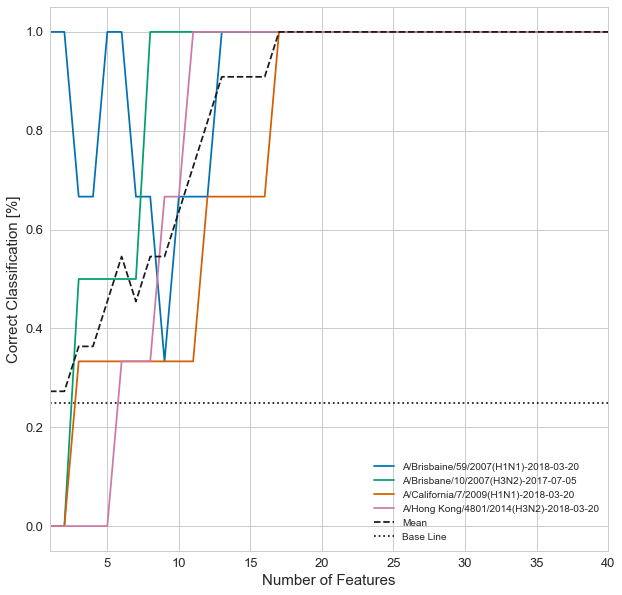

In [30]:
fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.tsplot(time="Peptide Batches", value="ms", unit="Collection", condition="Analyte Batch",data=result_m, ci=False)
mean_data = result_m.groupby(["Peptide Batches"]).mean().reset_index()
x = mean_data["Peptide Batches"] 
y = mean_data["ms"] 

ax.plot(x,y,c="k",linestyle="--", label = "Mean")
ax.legend(fontsize=13)


plt.xlabel("Number of Features",fontsize=15)
plt.ylabel("Correct Classification [%]",fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.hlines(y = 0.25,xmin=0,xmax=len(pbs),linestyle=":",label="Base Line") 
plt.legend()

#ax.set_ylim(0,1.1)
plt.show()

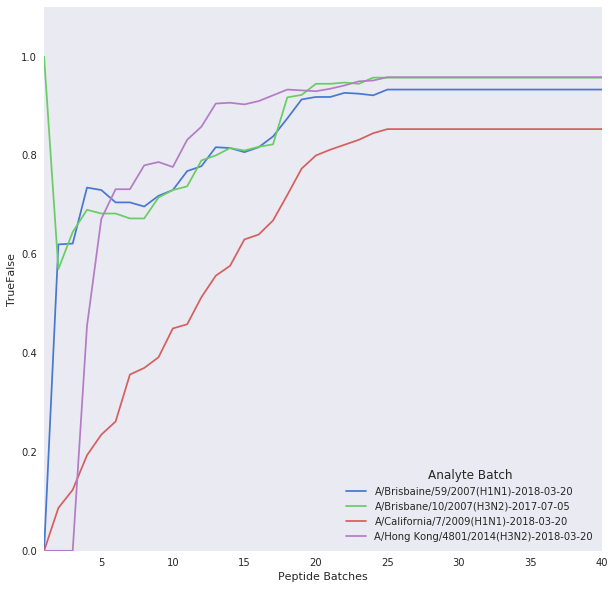

In [967]:
sns.set(style="dark", palette="muted", color_codes=True)
fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.tsplot(time="Peptide Batches", value="TrueFalse", unit="Test", condition="Analyte Batch",data=result_mean)
ax.set_ylim(0,1.1)
plt.show()

In [535]:
from matplotlib.lines import Line2D

def lda_plot(data, ax,contour=False, **kwargs):
    colors = ["r","g","b","k"]
    cmaps = ["Reds","Greens","Blues","Greys"]
              
    for (n, d),c,cmap in zip(data.groupby("Analyte Batch"),colors,cmaps):
        x = d["Principle 1"]
        y = d["Principle 2"]

        if contour:
            sns.kdeplot(x, y, cmap=cmap, label=n,ax=ax ,  shade=True, shade_lowest=False,**kwargs )
            continue

        
        d.plot.scatter(x="Principle 1",y="Principle 2",ax=ax, label=n,c=c ,**kwargs)

        
def add_legend(data,ax):
    a=[]
    for n,d in data.groupby("Analyte Batch"):
        a.append(n)
    cmaps = ["Reds","Greens","Blues","Greys"]
    cmmaps = [plt.get_cmap(name) for name in cmaps]
    custom_lines = [Line2D([0], [0], color=c(0.8), lw=8) for c in cmmaps]
    ax.legend(custom_lines,a)

In [648]:
reload(a2)
data = a2.Data(spots_dj=spots_dj).outlier_filtering().sample_on_collection(200).clean()

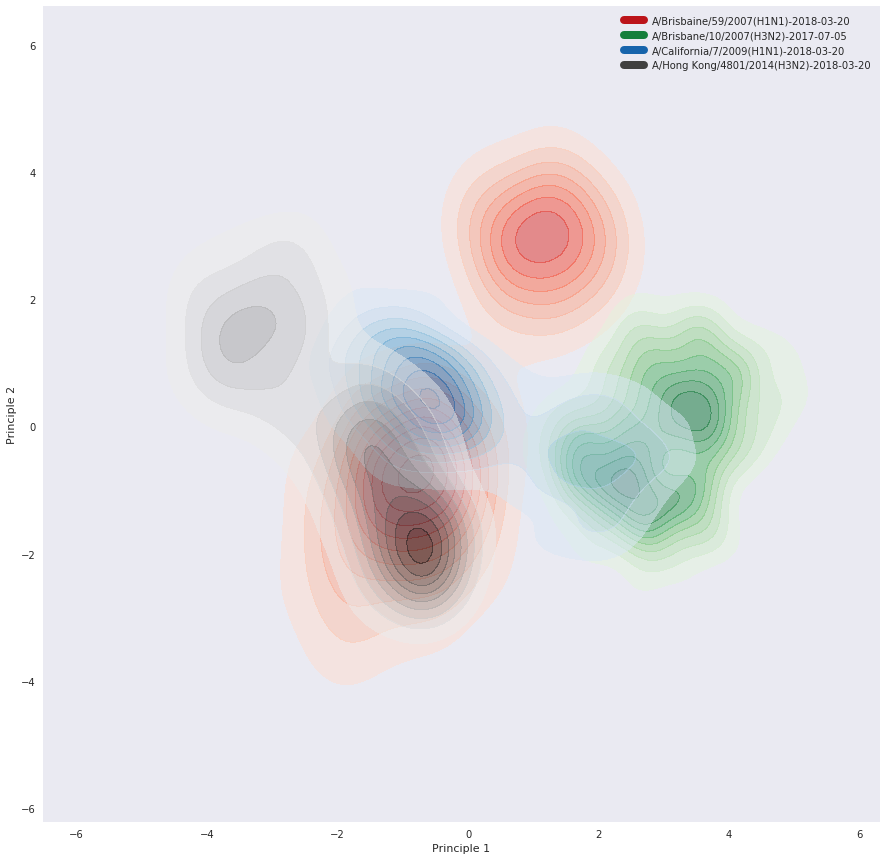

In [968]:

fig, ax = plt.subplots(figsize=(15,15))
lda_plot(data1,ax,contour=True,alpha=0.5)
add_legend(data1, ax)
plt.show()

In [12]:
import numpy as np
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
print (__version__) # requires version >= 1.9.0

#Always run this the command before at the start of notebook
init_notebook_mode(connected=True)
import plotly.graph_objs as go

2.2.3


In [13]:
data = a2.Data(spots_dj=spots_dj)
data = data.outlier_filtering().sample_on_collection(200).clean()
from sklearn import preprocessing

/home/janek89/Dev/flutype_analysis_web/preprocessing.py:14: RuntimeWarning:

invalid value encountered in double_scalars



In [14]:
test_data = data.x_pca_fit().transform(data.x)


In [15]:
le = preprocessing.LabelEncoder()

In [16]:
le.fit(data.y_names)
cs = le.transform(data.y_names)

In [17]:
colors =cs.astype(float) / cs.max()

In [18]:


import numpy as np

def lda_plot(data, ax,contour=False, **kwargs):
    colors = sns.color_palette()
    cmaps = ["Reds","Greens","Blues","Greys"]
              
    for (n, d),c,cmap in zip(data.groupby("Analyte Batch"),colors,cmaps):
        
        x = d["Principle 1"]
        y = d["Principle 2"]

        
trace1 = go.Scatter3d(
    x=test_data[:,0],
    y=test_data[:,1],
    z=test_data[:,2],
    mode='markers',
    marker=dict(
        size=7,
        color=colors,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1.1
    )
)

this = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=this, layout=layout)
iplot(fig, filename='3d-scatter-colorscale')

In [671]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
std_pca = make_pipeline(StandardScaler(), PCA(n_components=3))

std_pca.fit(data.x)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [675]:
dneu = std_pca.transform(data.x)
data1 = pd.DataFrame(dneu[:,1:],index=data.x.index , columns =["Principle 1", "Principle 2"])

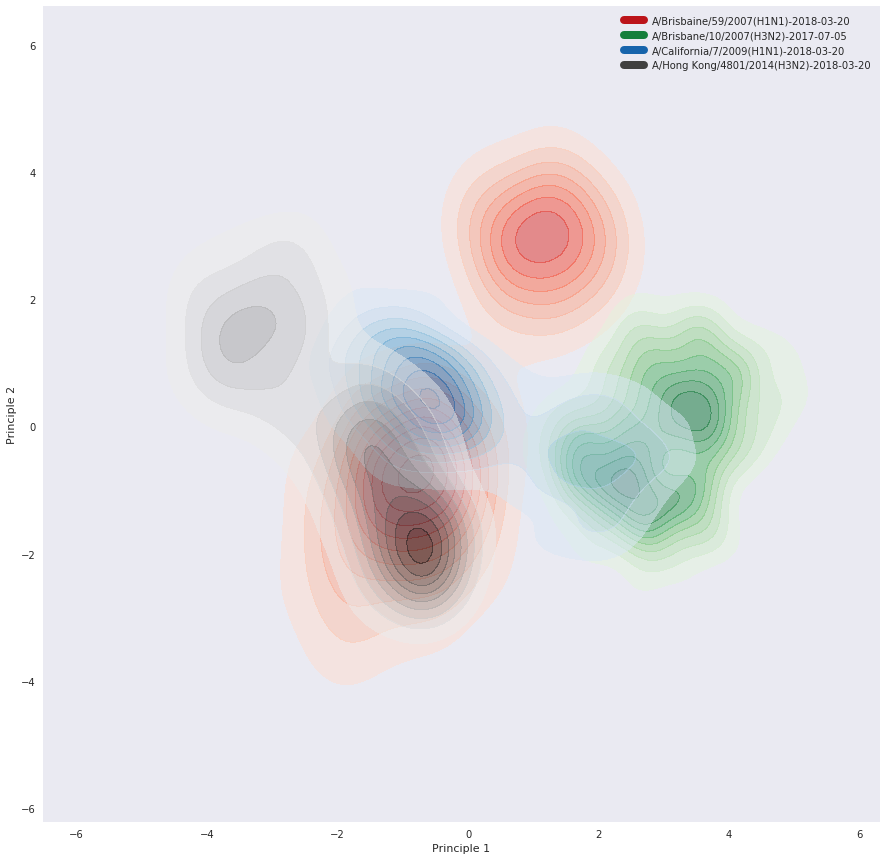

In [679]:
#data1 = pd.DataFrame(data.x_pca_fit().transform(data.x)[:,1:],index=data.x.index , columns =["Principle 1", "Principle 2"])
fig, ax = plt.subplots(figsize=(15,15))
lda_plot(data1,ax,contour=True,alpha=0.5)
add_legend(data1, ax)
plt.show()

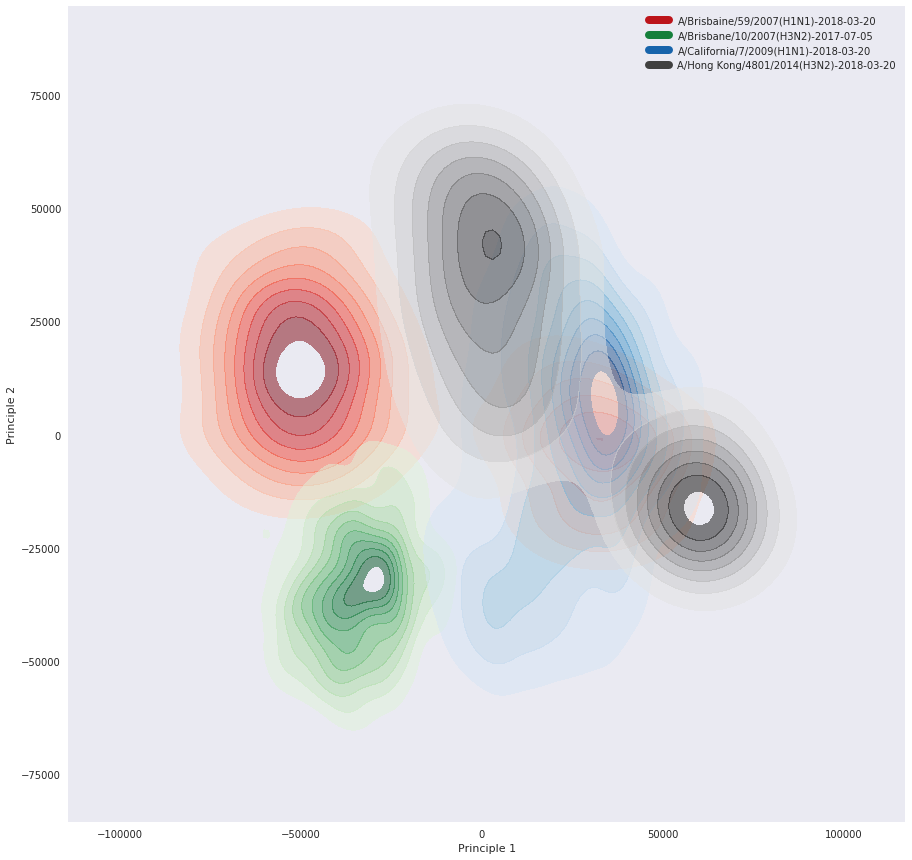

In [652]:
data1 = pd.DataFrame(data.x_pca_fit().transform(data.x)[:,:2],index=data.x.index , columns =["Principle 1", "Principle 2"])
fig, ax = plt.subplots(figsize=(15,15))
lda_plot(data1,ax,contour=True,alpha=0.5)
add_legend(data1, ax)
plt.show()